## Reformulation of the Fourth-Order PDE

We start with the PDE

$$
\Delta^2 u - \Delta u + u = f \qquad \text{in } \Omega = (0,1)
$$

with boundary conditions

$$
\frac{\partial u}{\partial n} = 0, 
\qquad 
\frac{\partial (\Delta u)}{\partial n} = 0.
$$

---

### Introducing an Auxiliary Variable

Let

$$
v = - \Delta u.
$$

Then

$$
\Delta u = -v,
$$

which allows rewriting the PDE:

$$
\Delta(-v) - \Delta u + u = f.
$$

Since \( \Delta(-v) = -\Delta v \), we obtain the **first-order system**

\[
\boxed{
\begin{aligned}
- \Delta v - \Delta u + u &= f,  \\
v + \Delta u &= 0.
\end{aligned}
}
\tag{1}
\]

---

## Weak Formulation

Multiply each equation by a test function  $\phi_j$ and integrate.

### Second equation:

$$
(v, \phi_j) + (\Delta u, \phi_j) = 0.
$$

Using integration by parts:

$$
(\Delta u, \phi_j) = -(\nabla u, \nabla \phi_j),
$$

so the weak form becomes

$$
(v, \phi_j) - (\nabla u, \nabla \phi_j) = 0.
$$

---

### First equation:

$$
-(\Delta v, \phi_j) - (\Delta u, \phi_j) + (u, \phi_j) = (f, \phi_j).
$$

Apply integration by parts:

$$
-(\Delta v, \phi_j) = (\nabla v, \nabla \phi_j), 
\qquad
-(\Delta u, \phi_j) = (\nabla u, \nabla \phi_j).
$$

Thus the weak form is

$$
(\nabla v, \nabla \phi_j)
+
(\nabla u, \nabla \phi_j)
+
(u, \phi_j)
=
(f, \phi_j).
$$

---

## Expanding in Basis Functions

Let the finite element expansions be

$$
u = \sum_{i=1}^{n} \alpha_i \phi_i,
\qquad
v = \sum_{i=1}^{n} b_i \phi_i.
$$

### Weak forms become

Second equation:

$$
\sum_{i=1}^{n} b_i (\phi_i, \phi_j)
-
\sum_{i=1}^{n} \alpha_i (\nabla \phi_i, \nabla \phi_j)
= 0.
$$

First equation:

$$
\sum_{i=1}^{n} b_i (\nabla \phi_i, \nabla \phi_j)
+
\sum_{i=1}^{n} \alpha_i (\nabla \phi_i, \nabla \phi_j)
+
\sum_{i=1}^{n} \alpha_i (\phi_i, \phi_j)
=
(f, \phi_j).
$$

---

## Matrix Definitions

Let

$$
K_{ij} = (\nabla \phi_i, \nabla \phi_j),
\qquad
M_{ij} = (\phi_i, \phi_j).
$$

Then the coupled system becomes

$$
\begin{bmatrix}
K + M & -K \\
-K & M
\end{bmatrix}
\begin{bmatrix}
\alpha \\
b
\end{bmatrix}
=
\begin{bmatrix}
(f, \phi_j) \\
0
\end{bmatrix}.
$$


In [1]:
import numpy as np

 ## Assembling the Mass and Stiff Matrix

In [2]:
def MK(n):
    x = np.linspace(0,1,n)
    h = x[1]-x[0]
    
    M = np.zeros((n,n))
    K = np.zeros((n,n))
    
    
    M[0,0:2] = np.array([2,1])
    M[-1,:] = M[0,::-1]
    
    K[0,0:2] = np.array([1,-1])
    K[-1,:] = K[0,::-1]
    
    for i in range(1,n-1):
        M[i,i-1:i+2] = np.array([1,4,1])
        K[i,i-1:i+2] = np.array([-1,2,-1])
    
    return (h/6)*M , (1/h)*K 

In [3]:
M,K = MK(5)

In [4]:
M
K

array([[ 4., -4.,  0.,  0.,  0.],
       [-4.,  8., -4.,  0.,  0.],
       [ 0., -4.,  8., -4.,  0.],
       [ 0.,  0., -4.,  8., -4.],
       [ 0.,  0.,  0., -4.,  4.]])

## Assembling the load vector

In [5]:
pi = np.pi
c = 1 + pi**2
n = 5
x = np.linspace(0,1,n)
h = x[1] - x[0]
# integral of bcos*pi*x
def I0(a,b):
    return (np.sin(pi*b) - np.sin(pi*a))/pi
    


#integral of xcos*pi*x
def I1(a,b):
    return (b*np.sin(pi*b) - a*np.sin(pi*a)) / pi + (np.cos(pi*b) - np.cos(pi*a)) / pi**2


# loop to assemble F

def f(x):
    return (1+pi**2)*np.cos(pi*x)

f_new = f(x)
F = np.zeros(n)

for i in range(n-1):
    a = x[i]
    b = x[i+1]
    F1 =(c/h) *(b*I0(a,b)-I1(a,b)) 
    F2 = (c/h) * (I1(a,b)-a*I0(a,b))
    
    F[i] += F1
    F[i+1] += F2


    

In [6]:
F

nF = M@f_new
print(nF)

[ 1.22604916e+00  1.73389535e+00  1.84217082e-16 -1.73389535e+00
 -1.22604916e+00]


In [7]:
# assembling A

A = M + K

# solving alpha
alpha = np.linalg.solve(A,F)

print(alpha)

[ 1.00460073e+00  7.10359988e-01  1.39384415e-15 -7.10359988e-01
 -1.00460073e+00]


Solving for a matrix of matrices.

In [8]:
print(A)

[[ 4.08333333 -3.95833333  0.          0.          0.        ]
 [-3.95833333  8.16666667 -3.95833333  0.          0.        ]
 [ 0.         -3.95833333  8.16666667 -3.95833333  0.        ]
 [ 0.          0.         -3.95833333  8.16666667 -3.95833333]
 [ 0.          0.          0.         -3.95833333  4.08333333]]


In [9]:
# constructing F


pi = np.pi


def F(x,M):
    f = (pi**4 + pi**2 +1) * np.cos(pi*x)
    f = M@f
    
    # represent the zeros
    z = np.zeros(n)
    
    return np.hstack((f,z))


    

## Handling 

In [10]:
import matplotlib.pyplot as plt

(10, 10)
(20, 20)
(40, 40)
(80, 80)
(160, 160)
(200, 200)


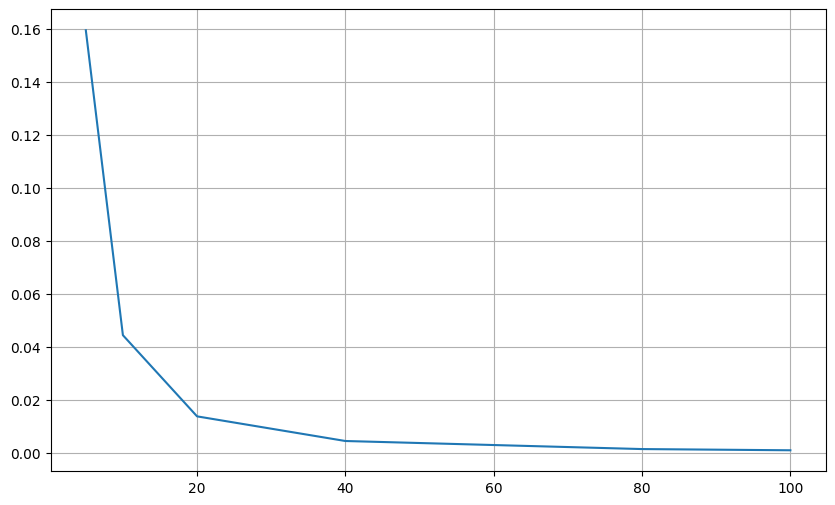

In [11]:
steps = [5,10,20,40,80,100]
err_u = []
err_v = []
for n in steps:
    M,K = MK(n)
    
    x = np.linspace(0,1,n)
    force_func = F(x,M)
    
    u_exact = np.cos(pi*x)
    v_exact = (pi**2)* np.cos(pi*x)
    
    A = np.block([[K,K+M],[M,-K]])
    print(A.shape)
    
    linear_solve = np.linalg.solve(A,force_func)
    v_vector = linear_solve[:n]
    u_vector = linear_solve[n:]
    
    err_u.append(np.linalg.norm(abs(u_exact - u_vector)))
    err_v.append( np.linalg.norm(abs(v_exact - v_vector)))
    # print("error of u")
    # print(err_u)
    # print("error of v")
    # print(err_v)
    
# print(len(err_u),len(n))
plt.figure(figsize=(10,6))
plt.plot(steps,err_u)
plt.grid(True)
plt.show()
    

In [12]:
linear_solve

array([ 9.868867  ,  9.86389844,  9.84899778,  9.82418   ,  9.78947012,
        9.74490306,  9.69052371,  9.62638683,  9.55255699,  9.46910854,
        9.3761255 ,  9.27370149,  9.16193966,  9.04095252,  8.91086191,
        8.77179883,  8.62390328,  8.46732419,  8.30221923,  8.12875463,
        7.94710507,  7.75745344,  7.55999072,  7.35491573,  7.14243496,
        6.92276237,  6.69611914,  6.46273349,  6.22284041,  5.97668145,
        5.72450449,  5.46656344,  5.20311802,  4.9344335 ,  4.66078042,
        4.38243434,  4.09967551,  3.81278866,  3.52206265,  3.22779023,
        2.93026769,  2.62979463,  2.32667358,  2.02120977,  1.71371077,
        1.40448621,  1.09384745,  0.78210728,  0.4695796 ,  0.15657909,
       -0.15657909, -0.4695796 , -0.78210728, -1.09384745, -1.40448621,
       -1.71371077, -2.02120977, -2.32667358, -2.62979463, -2.93026769,
       -3.22779023, -3.52206265, -3.81278866, -4.09967551, -4.38243434,
       -4.66078042, -4.9344335 , -5.20311802, -5.46656344, -5.72

In [13]:
v_vector

array([ 9.868867  ,  9.86389844,  9.84899778,  9.82418   ,  9.78947012,
        9.74490306,  9.69052371,  9.62638683,  9.55255699,  9.46910854,
        9.3761255 ,  9.27370149,  9.16193966,  9.04095252,  8.91086191,
        8.77179883,  8.62390328,  8.46732419,  8.30221923,  8.12875463,
        7.94710507,  7.75745344,  7.55999072,  7.35491573,  7.14243496,
        6.92276237,  6.69611914,  6.46273349,  6.22284041,  5.97668145,
        5.72450449,  5.46656344,  5.20311802,  4.9344335 ,  4.66078042,
        4.38243434,  4.09967551,  3.81278866,  3.52206265,  3.22779023,
        2.93026769,  2.62979463,  2.32667358,  2.02120977,  1.71371077,
        1.40448621,  1.09384745,  0.78210728,  0.4695796 ,  0.15657909,
       -0.15657909, -0.4695796 , -0.78210728, -1.09384745, -1.40448621,
       -1.71371077, -2.02120977, -2.32667358, -2.62979463, -2.93026769,
       -3.22779023, -3.52206265, -3.81278866, -4.09967551, -4.38243434,
       -4.66078042, -4.9344335 , -5.20311802, -5.46656344, -5.72

In [14]:
u_vector

array([ 0.99984138,  0.999338  ,  0.99782838,  0.99531402,  0.99179747,
        0.98728226,  0.98177294,  0.97527506,  0.96779516,  0.95934078,
        0.94992042,  0.93954357,  0.92822067,  0.91596314,  0.90278332,
        0.88869446,  0.87371077,  0.85784732,  0.84112009,  0.82354593,
        0.80514252,  0.78592841,  0.76592293,  0.74514624,  0.72361924,
        0.70136362,  0.67840179,  0.65475686,  0.63045265,  0.60551362,
        0.5799649 ,  0.5538322 ,  0.52714184,  0.49992069,  0.47219616,
        0.44399617,  0.41534912,  0.38628384,  0.35682961,  0.32701608,
        0.29687328,  0.26643155,  0.23572154,  0.20477418,  0.17362063,
        0.14229226,  0.11082062,  0.07923739,  0.04757437,  0.01586345,
       -0.01586345, -0.04757437, -0.07923739, -0.11082062, -0.14229226,
       -0.17362063, -0.20477418, -0.23572154, -0.26643155, -0.29687328,
       -0.32701608, -0.35682961, -0.38628384, -0.41534912, -0.44399617,
       -0.47219616, -0.49992069, -0.52714184, -0.5538322 , -0.57